# Install DTW

In [ ]:
#安装dtw
!pip install dtwalign -i https://pypi.tuna.tsinghua.edu.cn/simple
from dtwalign import dtw
from dtwalign import dtw_from_distance_matrix

# Changing The Working Directory

In [2]:
cd/PyCharm/Machine-Learning-Competition-2023-main/data

F:\PyCharm\Machine-Learning-Competition-2023-main\data


# Import the required libraries

In [3]:
# import libraries
import pandas as pd
import numpy as np
import glob
import os
import shutil #used to zip predictions for submission

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

from dtwalign import dtw
from dtwalign import dtw_from_distance_matrix
from scipy.ndimage import gaussian_filter
from scipy import interpolate

# import sklearn libararies
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
np.random.seed(50)

# Read Data

In [4]:
files=glob.glob('train/*.csv')
# print(files)
df = []
for i in files:
    df0=pd.read_csv(i)
    df0['log_RD']=np.log10(df0['RD'])
    df0['well']=i.split('_')[-1].split('.')[0]
    df.append(df0.copy())
df_c=pd.concat(df)
print(df_c)

         DEPT       GR    RHOB    NPHI        RD    log_RD well
0       411.0  94.0070  2.2421  0.4708  310.5130  2.492080   01
1       411.5  95.0090  2.2631  0.4757  726.1380  2.861019   01
2       412.0  96.1010  2.2757  0.4510  975.6390  2.989289   01
3       412.5  95.6830  2.2726  0.4282  975.6390  2.989289   01
4       413.0  93.0250  2.2764  0.4085  975.6390  2.989289   01
...       ...      ...     ...     ...       ...       ...  ...
10219  5606.5  34.5635  2.4937  0.1164  241.1250  2.382242   09
10220  5607.0  38.6881  2.5026  0.1132  138.9480  2.142852   09
10221  5607.5  41.0457  2.5190  0.1132   87.5894  1.942452   09
10222  5608.0  43.9938  2.5309  0.1148   83.7155  1.922806   09
10223  5608.5  43.9985  2.5364  0.1164   86.7126  1.938082   09

[69304 rows x 7 columns]


# Glimps Data

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
for idx,i in enumerate(df):
    print(f"well {i.loc[0,'well']}:")
    display(i.describe())
    display(i.head())

well 01:


,DEPT,GR,RHOB,NPHI,RD,log_RD
count,8881.00,8881.00,8881.00,8881.00,8881.00,8881.00
mean,2631.00,113.68,2.49,0.28,7.35,0.80
std,1281.93,27.04,0.08,0.06,19.98,0.18
min,411.00,25.62,1.35,0.06,1.33,0.12
25%,1521.00,96.99,2.46,0.25,5.28,0.72
50%,2631.00,107.59,2.50,0.28,6.51,0.81
75%,3741.00,127.36,2.54,0.31,7.98,0.90
max,4851.00,246.98,2.77,0.67,975.64,2.99


,DEPT,GR,RHOB,NPHI,RD,log_RD,well
0,411.00,94.01,2.24,0.47,310.51,2.49,01
1,411.50,95.01,2.26,0.48,726.14,2.86,01
2,412.00,96.10,2.28,0.45,975.64,2.99,01
3,412.50,95.68,2.27,0.43,975.64,2.99,01
4,413.00,93.03,2.28,0.41,975.64,2.99,01


well 02:


,DEPT,GR,RHOB,NPHI,RD,log_RD
count,7955.00,7955.00,7955.00,7955.00,7955.00,7955.00
mean,2383.50,96.96,2.40,0.31,27.31,0.85
std,1148.28,22.68,0.13,0.07,192.56,0.33
min,395.00,45.85,1.75,0.03,0.35,-0.46
25%,1389.25,82.98,2.35,0.27,5.38,0.73
50%,2383.50,93.29,2.44,0.33,6.87,0.84
75%,3377.75,107.27,2.49,0.35,8.45,0.93
max,4372.00,232.21,2.60,0.46,1957.67,3.29


,DEPT,GR,RHOB,NPHI,RD,log_RD,well
0,395.00,84.87,2.16,0.39,2.06,0.31,02
1,395.50,84.66,2.09,0.40,3.79,0.58,02
2,396.00,84.67,1.97,0.40,5.04,0.70,02
3,396.50,84.91,1.96,0.41,5.84,0.77,02
4,397.00,85.15,1.95,0.41,6.26,0.80,02


well 03:


,DEPT,GR,RHOB,NPHI,RD,log_RD
count,7593.00,7593.00,7593.00,7593.00,7593.00,7593.00
mean,2371.00,109.09,2.50,0.29,7.66,0.80
std,1096.03,25.09,0.07,0.05,26.03,0.21
min,473.00,7.34,1.47,0.04,1.25,0.10
25%,1422.00,96.43,2.47,0.27,4.94,0.69
50%,2371.00,105.25,2.50,0.30,6.99,0.84
75%,3320.00,121.34,2.53,0.32,8.23,0.92
max,4269.00,238.74,2.74,0.61,1292.76,3.11


,DEPT,GR,RHOB,NPHI,RD,log_RD,well
0,473.00,64.50,2.30,0.33,1065.44,3.03,03
1,473.50,62.98,2.31,0.31,1214.96,3.08,03
2,474.00,62.04,2.31,0.31,1292.76,3.11,03
3,474.50,62.18,2.30,0.31,817.98,2.91,03
4,475.00,64.77,2.29,0.33,417.21,2.62,03


well 04:


,DEPT,GR,RHOB,NPHI,RD,log_RD
count,3155.00,3155.00,3155.00,3155.00,3155.00,3155.00
mean,3292.00,114.00,2.50,0.20,7.62,0.79
std,455.46,35.12,0.13,0.05,5.83,0.27
min,2503.50,16.48,2.00,0.07,1.23,0.09
25%,2897.75,94.56,2.46,0.17,3.91,0.59
50%,3292.00,114.73,2.53,0.19,5.75,0.76
75%,3686.25,132.92,2.58,0.23,8.78,0.94
max,4080.50,400.00,3.05,0.46,47.94,1.68


,DEPT,GR,RHOB,NPHI,RD,log_RD,well
0,2503.50,124.81,2.54,0.26,5.97,0.78,04
1,2504.00,120.11,2.54,0.26,5.95,0.77,04
2,2504.50,117.00,2.54,0.26,6.10,0.79,04
3,2505.00,119.21,2.54,0.25,6.27,0.80,04
4,2505.50,121.56,2.53,0.24,6.32,0.80,04


well 05:


,DEPT,GR,RHOB,NPHI,RD,log_RD
count,10345.00,10345.00,10345.00,10345.00,10345.00,10345.00
mean,3067.00,101.85,2.51,0.25,107.66,1.05
std,1493.24,32.81,0.16,0.09,1507.40,0.50
min,481.00,12.06,1.27,0.01,0.21,-0.68
25%,1774.00,88.84,2.46,0.19,6.32,0.80
50%,3067.00,104.16,2.52,0.27,8.36,0.92
75%,4360.00,118.77,2.58,0.31,16.78,1.22
max,5653.00,399.73,2.96,0.65,49851.05,4.70


,DEPT,GR,RHOB,NPHI,RD,log_RD,well
0,481.00,71.77,2.73,0.36,0.21,-0.68,05
1,481.50,79.11,2.59,0.34,0.27,-0.56,05
2,482.00,87.47,2.50,0.34,0.78,-0.11,05
3,482.50,91.11,2.48,0.36,4.18,0.62,05
4,483.00,92.33,2.47,0.37,10.96,1.04,05


well 06:


,DEPT,GR,RHOB,NPHI,RD,log_RD
count,3521.00,3521.00,3521.00,3521.00,3521.00,3521.00
mean,3160.00,117.57,2.49,0.26,8.80,0.83
std,508.28,31.25,0.08,0.05,7.91,0.30
min,2280.00,17.83,2.00,0.09,1.34,0.13
25%,2720.00,101.02,2.45,0.23,4.22,0.63
50%,3160.00,116.86,2.51,0.26,6.25,0.80
75%,3600.00,132.66,2.54,0.29,9.68,0.99
max,4040.00,255.45,2.88,0.50,47.58,1.68


,DEPT,GR,RHOB,NPHI,RD,log_RD,well
0,2280.00,100.36,2.38,0.30,5.31,0.72,06
1,2280.50,100.03,2.40,0.28,5.03,0.70,06
2,2281.00,99.70,2.47,0.26,4.75,0.68,06
3,2281.50,99.01,2.50,0.25,4.47,0.65,06
4,2282.00,95.78,2.53,0.26,4.20,0.62,06


well 07:


,DEPT,GR,RHOB,NPHI,RD,log_RD
count,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00
mean,3156.75,101.51,2.51,0.25,114.33,1.05
std,1493.39,33.01,0.16,0.09,1590.81,0.50
min,570.50,10.99,1.27,0.01,0.31,-0.51
25%,1863.62,88.40,2.47,0.19,6.37,0.80
50%,3156.75,103.58,2.52,0.27,8.49,0.93
75%,4449.88,118.67,2.58,0.31,16.83,1.23
max,5743.00,400.00,2.96,0.66,49485.67,4.69


,DEPT,GR,RHOB,NPHI,RD,log_RD,well
0,570.50,78.00,2.80,0.40,0.31,-0.51,07
1,571.00,83.80,2.70,0.38,2.12,0.33,07
2,571.50,89.21,2.50,0.37,7.10,0.85,07
3,572.00,93.04,2.48,0.35,7.28,0.86,07
4,572.50,93.40,2.47,0.36,6.17,0.79,07


well 08:


,DEPT,GR,RHOB,NPHI,RD,log_RD
count,7284.00,7284.00,7284.00,7284.00,7284.00,7284.00
mean,2370.75,114.12,2.49,0.29,7.99,0.84
std,1051.43,23.59,0.09,0.06,5.87,0.22
min,550.00,38.64,2.00,-0.01,1.36,0.13
25%,1460.38,100.23,2.46,0.26,5.41,0.73
50%,2370.75,110.55,2.51,0.30,7.52,0.88
75%,3281.12,124.81,2.54,0.32,8.82,0.95
max,4191.50,385.83,2.91,0.69,121.38,2.08


,DEPT,GR,RHOB,NPHI,RD,log_RD,well
0,550.00,92.74,2.49,0.36,7.43,0.87,08
1,550.50,94.72,2.49,0.36,7.12,0.85,08
2,551.00,95.79,2.48,0.37,7.03,0.85,08
3,551.50,94.09,2.48,0.36,7.03,0.85,08
4,552.00,91.99,2.48,0.35,6.83,0.83,08


well 09:


,DEPT,GR,RHOB,NPHI,RD,log_RD
count,10224.00,10224.00,10224.00,10224.00,10224.00,10224.00
mean,3052.75,99.68,2.51,0.25,25.46,0.93
std,1475.78,32.30,0.15,0.09,120.05,0.43
min,497.00,8.43,1.43,0.01,1.03,0.01
25%,1774.88,89.35,2.47,0.18,4.94,0.69
50%,3052.75,103.65,2.52,0.27,6.94,0.84
75%,4330.62,118.19,2.58,0.31,12.07,1.08
max,5608.50,251.97,2.98,0.66,2000.00,3.30


,DEPT,GR,RHOB,NPHI,RD,log_RD,well
0,497.00,82.73,2.45,0.46,1195.41,3.08,09
1,497.50,88.36,2.43,0.43,67.30,1.83,09
2,498.00,88.56,2.40,0.40,2.35,0.37,09
3,498.50,88.76,2.38,0.39,1.90,0.28,09
4,499.00,90.15,2.41,0.39,7.84,0.89,09


# Removing the Outliers
The Isolation Forest algorithm is used to detect anomalies in the feature features in the df_c dataset.  
This session sets random seeds to ensure consistent results for each run.   
Set the number of decision trees included in the isolated forest n_estimators=200   
Set the number of randomly selected samples for each decision tree at build time max_samples=50

In [6]:
# def my_custom_loss_func(model,X_test):
#     fenshu=model.decision_function(X_test)
#     zhengchang=[]
#     yichang=[]
#     for j in fenshu:
#         if j>0:
#             zhengchang.append(j)
#         else:
#             yichang.append(j)
#     return -np.var(zhengchang)-np.var(yichang)

# from sklearn.metrics import make_scorer, accuracy_score
# from sklearn.model_selection import RandomizedSearchCV
# features=['GR','RHOB','NPHI','log_RD','DEPT']
# # Remove anomlay
# scorer = make_scorer(accuracy_score)
# model = IsolationForest(random_state=0)
# params = {
#     'n_estimators': [50, 100, 200],
#     'max_samples': [50, 100, 200],
#     'contamination': [0.01, 0.05, 0.1]
# }
# df_c[features]=pd.DataFrame(df_c[features])
# print(df_c[features])
# # 进行网格搜索
# grid_search = RandomizedSearchCV(model, params, cv=5, n_iter=20, random_state=42, scoring=my_custom_loss_func)
# grid_search.fit(df_c[features].values)

# # 输出最佳结果
# print('Best score:', grid_search.best_score_)
# print('Best parameters:', grid_search.best_params_)
features=['GR','RHOB','NPHI','log_RD','DEPT']
# Remove anomlay
clf1 = IsolationForest(random_state=0, n_estimators=200, max_samples=50).fit_predict(df_c[features])
# clf2 = IsolationForest(random_state=0).fit_predict(df_c[features])
dfc_stb1 = df_c[clf1==1]
# dfc_stb2 = df_c[clf2==1]
print(dfc_stb1.describe())
# print(dfc_stb2.describe())
# dfc_stb1,dfc_stb2

          DEPT       GR     RHOB     NPHI       RD   log_RD
count 52936.00 52936.00 52936.00 52936.00 52936.00 52936.00
mean   2464.93   111.16     2.50     0.28     7.27     0.83
std    1097.93    21.38     0.06     0.05     3.00     0.17
min     424.00    39.80     2.19     0.06     1.29     0.11
25%    1517.00    97.94     2.47     0.25     5.38     0.73
50%    2506.00   107.52     2.51     0.29     6.99     0.84
75%    3348.50   122.23     2.54     0.32     8.43     0.93
max    5339.50   272.49     3.00     0.43    35.05     1.54


# Bivariate Statistics
Its goal is to study the correlation or independence between these random variables.

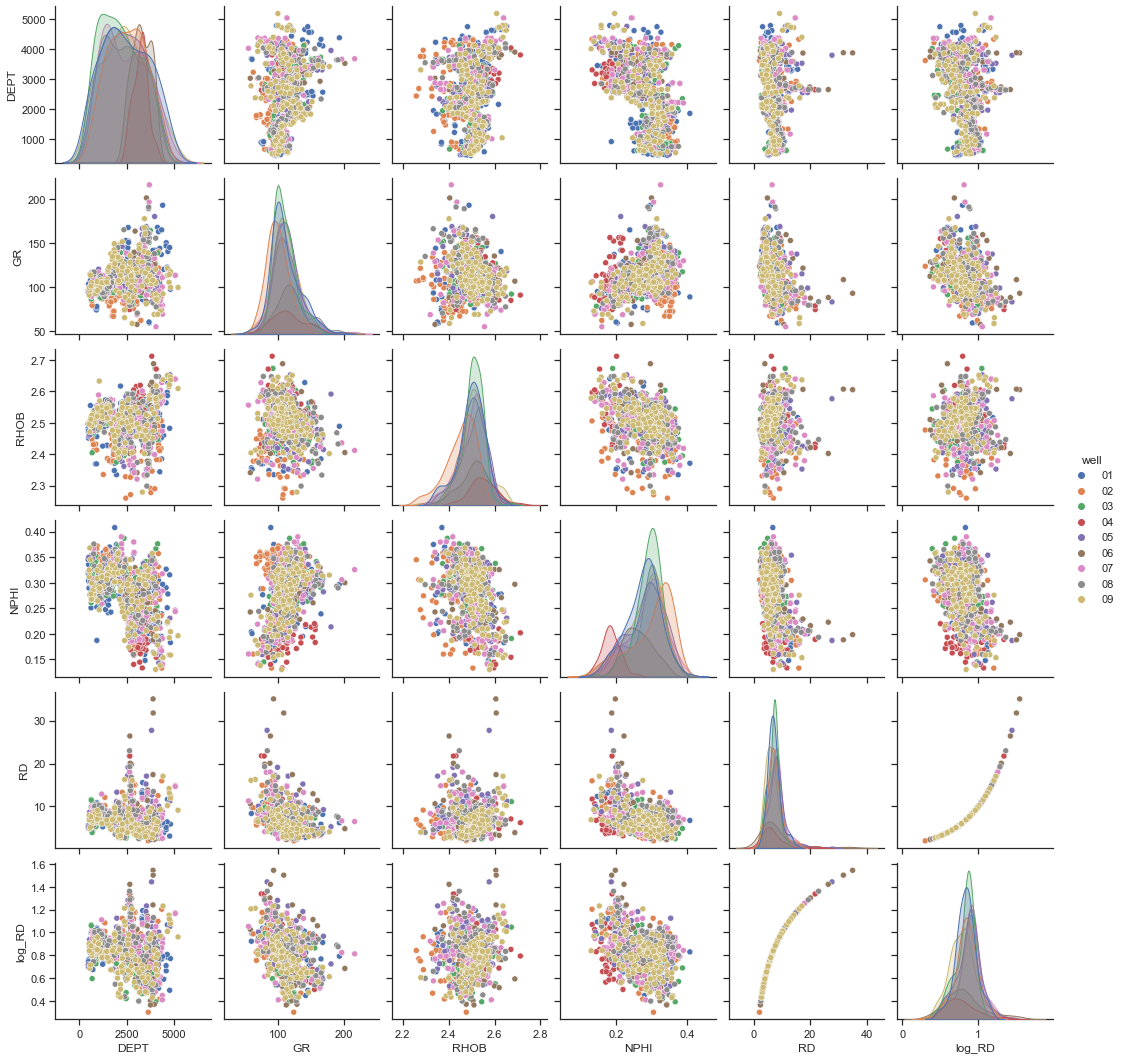

In [7]:
dfc_stb1.reset_index(drop=True, inplace=True) # 重置索引，drop=True 表示丢弃旧的索引列
# dfc_stb2.drop_duplicates(subset='well', keep='first', inplace=True)
# print(dfc_stb2)
# dfc_stb2.sort_values('well', ascending=True, inplace=True)
# sns.pairplot(dfc_stb2.sample(1000), hue='well')

sns.pairplot(dfc_stb1.sample(1000).sort_values('well'), hue='well')

#  Build Machine Models for Well-Log Prediction


## Splitting the Data Set Into Training and Testing Data Sets
Prior to data preprocessing and training supervised learning models, a common practice is to split the dataset into a training set and a test set. The reason for doing so is to avoid leakage of information from the test dataset into the training dataset to ensure that the generalization ability of the model can be accurately assessed.  

In the code below, we will use a common strategy to split the dataset into a training set and a test set. This is done by using 65% of the dataset as the training set and the remaining 35% as the validation set. Of course, depending on the situation, you can also choose other strategies for separating the training and testing sets.  

It is important to note that after the dataset is split, the test set should be considered "sealed" and no further operations should be performed on it to ensure the purity of the test set, which is only used for the final evaluation of the model's performance. This way, the generalization ability of the model in real situations can be better evaluated.  

In [8]:
wells=dfc_stb1['well'].unique()
np.random.shuffle(wells)
split=0.65
n=int(np.round(len(wells)*split))
train_well,val_well=dfc_stb1[dfc_stb1['well'].isin(wells[:n])].copy(),dfc_stb1[dfc_stb1['well'].isin(wells[n:])].copy()
print("Train Set Wells:")
print(train_well['well'].unique())

print("Validation Set Wells:")
print(val_well['well'].unique())

Train Set Wells:
['01' '02' '03' '05' '07' '08']
Validation Set Wells:
['04' '06' '09']


We finally found that dividing the wells '01' '02' '03' '06' '08' '09' is optimal when choosing them as the training set.

In [9]:
wells=dfc_stb1['well'].unique()
np.random.shuffle(wells)
split=0.65
n=int(np.round(len(wells)*split))
train_well,val_well=dfc_stb1[dfc_stb1['well'].isin(wells[:n])].copy(),dfc_stb1[dfc_stb1['well'].isin(wells[n:])].copy()
print("Train Set Wells:")
print(train_well['well'].unique())

print("Validation Set Wells:")
print(val_well['well'].unique())

Train Set Wells:
['01' '02' '03' '06' '08' '09']
Validation Set Wells:
['04' '05' '07']


In [10]:
def grid_search(clf, param_grid, X_train, y_train):
    """
    Fits a classifier to its training data and prints its RMSE score.
    
    INPUT:
    - clf (classifier): classifier to fit
    - param_grid (dict): classifier parameters used with GridSearchCV
    - X_train (DataFrame): training input
    - y_train (DataFrame): training output
            
    OUTPUT:
    - classifier: input classifier fitted to the training data
    """
    # cv uses StratifiedKFold
    # scoring r2 as parameter
    grid = GridSearchCV(estimator=clf, 
                        param_grid=param_grid, 
                        cv=5)
    grid.fit(X_train, y_train)
    return grid.best_estimator_

# Training & Validation
First, we define two lists: x_feat contains the two feature columns 'GR' and 'DEPT' and y_feat contains the three target columns 'RHOB', 'NPHI' and 'log_RD'.

We then use a loop for each target column. In the loop, we create a pipeline that includes the data normalization processor and the ridge regression model. Next, we use a grid search method to find the best model parameters on the training set and store them in the model_best variable.

We then use model_best to predict the feature column x_feat on the validation set and obtain the prediction y_pred. next, we calculate the root mean square error of the prediction with respect to the target column of the validation set as the score of the model corresponding to the target column. We then add that score to the score list and output the score for that target column.

Finally, the score list stores the root-mean-square error scores of the three target columns on the test set. The purpose of this code is to train multiple regression models using pipeline and lattice search methods and obtain an assessment of their performance on the validation set.

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

x_feat = ['GR', 'DEPT']
y_feat = ['RHOB', 'NPHI', 'log_RD']
score = []
for feat in y_feat:
    # 创建一个管道，包括StandardScaler和Ridge模型
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=0.8, max_iter=10000, tol=1e-4, solver='cholesky'))
    ])

    model_best = grid_search(pipeline, {}, X_train=train_well[x_feat].values, y_train=train_well[feat].values)
    y_pred = model_best.predict(val_well[x_feat].values)
    score.append(np.sqrt(np.mean((y_pred - val_well[feat]) ** 2)) / val_well[feat].std())
    print(f"RMSE {feat}: {score[-1]}")

RMSE RHOB: 0.9998981966787489
RMSE NPHI: 0.8130253072928942
RMSE log_RD: 0.9498161635145032


NPHI has the lowest RMS, so it will be aligned first

Using the data to be corrected as input to machine learning ridge regression, it is possible to predict and correct these erroneous values by modeling the relationship between inputs and outputs. While there are some potential problems with doing this, in some cases it may be feasible to use machine learning models for correction.
Here are some of the potential benefits that may come from using the data that needs to be corrected as input to machine learning ridge regression:  
Learning data patterns: by using erroneous values as inputs, the model can learn patterns of relationships between input features and target features. This helps the model to understand the structure and patterns of the data and learn from it how to make reasonable corrections to the erroneous values.  
Correcting possible errors: by learning the association between input and target features, the model can try to correct the wrong values based on information from other features. This may help to fix anomalous or noisy data and bring it closer to the true value.  
Combining contextual information: if other relevant features are used as inputs in the correction process, the model can combine information from these features to provide more accurate correction results. Such contextual information may include values of neighboring data points, time series trends, etc.  
There may also be some challenges and risks associated with using incorrect values as inputs for correction. For example, the model may not be able to correct accurately if the incorrect value occupies a large percentage or deviates far from the true value.

In [12]:
x_feat1=['GR','DEPT','RHOB','log_RD','NPHI']
y_feat1=['NPHI']
score=[]
for feat in y_feat1:
    # model
    model = Ridge()
    model_best_1 = grid_search(model, {}, X_train=train_well[x_feat1].values, y_train=train_well[feat].values)
    feat_name=feat+'_pred'
    val_well[feat_name]=model_best_1.predict(val_well[x_feat1].values)

Compare RHOB and log_RD

In [13]:
x_feat=['GR','DEPT','NPHI']
y_feat=['RHOB','log_RD']
score=[]
for feat in y_feat:
    model = Ridge()
    model_best = grid_search(model, {}, X_train=train_well[x_feat].values, y_train=train_well[feat].values)
    y_pred=model_best.predict(val_well[x_feat].values)
    score.append(np.sqrt(np.mean((y_pred-val_well[feat])**2))/val_well[feat].std())
    print(f"RMSE {feat}:{score[-1]}")

RMSE RHOB:0.9428743091029552
RMSE log_RD:0.9216293801027327


LogRD has the lowest RMS, so it will be aligned second

In [14]:
x_feat2=['GR','DEPT','NPHI','RHOB','log_RD']
y_feat2=['log_RD']
score=[]
for feat in y_feat2:
    model = Ridge()
    model_best_2 = grid_search(model, {}, X_train=train_well[x_feat2].values, y_train=train_well[feat].values)
    feat_name=y_feat2[0]+'_pred'
    val_well[feat_name]=model_best_2.predict(val_well[x_feat2].values)

RHOB is predicted last

In [15]:
x_feat3=['GR','DEPT','NPHI','RHOB','log_RD']
y_feat3=['RHOB']
score=[]
for feat in y_feat3:
    model = Ridge()
    model_best_3 = grid_search(model, {}, X_train=train_well[x_feat3].values, y_train=train_well[feat].values)
    y_pred=model_best_3.predict(val_well[x_feat3].values)
    score.append(np.sqrt(np.mean((y_pred-val_well[feat])**2))/val_well[feat].std())
    print(f"RMSE {feat}:{score[-1]}")    
    feat_name=y_feat3[0]+'_pred'
    val_well[feat_name]=model_best_3.predict(val_well[x_feat3].values)

RMSE RHOB:0.007593830975722069


# Visualization
The Random Forest regressor is then applied to the validation data set.

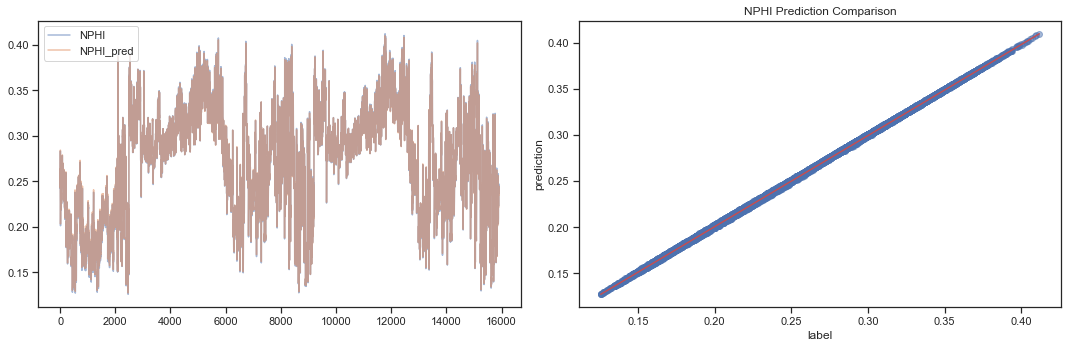

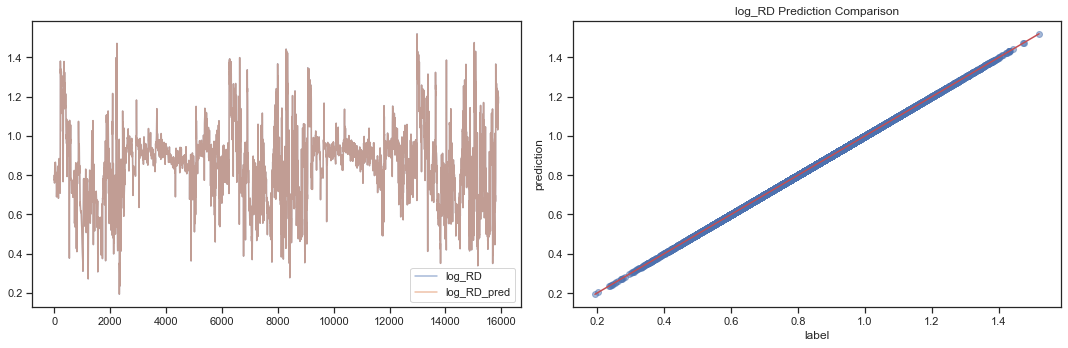

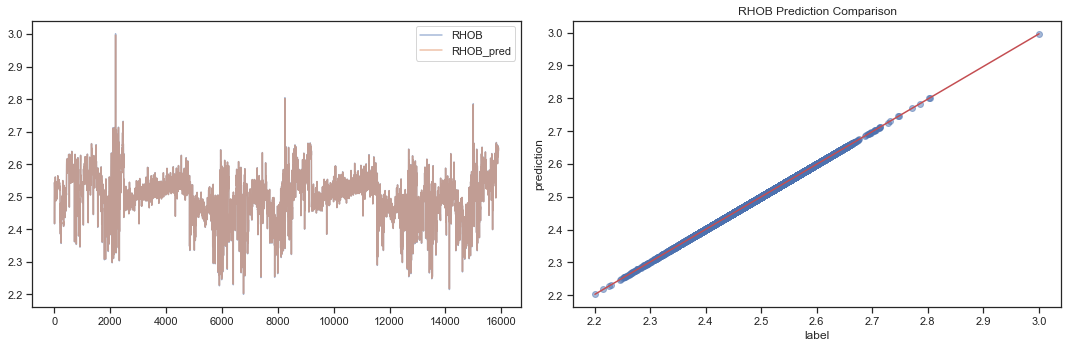

In [16]:
for feat in ['NPHI','log_RD','RHOB']:
    fig, axs = plt.subplots(1,2,figsize=(15, 5))
    axs[0].plot(val_well[feat].values,label=feat,alpha=0.5)
    axs[0].plot(val_well[feat+'_pred'].values,label=feat+'_pred',alpha=0.5)
    axs[0].legend()
    plt.xlabel('sample')
    plt.ylabel('value')
    plt.title(f'{feat} Prediction Comparison')
    axs[1].scatter(val_well[feat].values, val_well[feat+'_pred'].values,alpha=0.5)
    axs[1].plot([np.min(val_well[feat].values), np.max(val_well[feat].values)], [np.min(val_well[feat+'_pred'].values), np.max(val_well[feat+'_pred'].values)], color='r')
    plt.xlabel('label')
    plt.ylabel('prediction')
    plt.title(f'{feat} Prediction Comparison')
    plt.tight_layout()

# Build DTW-Based Well-Log Alignment model for Validation Data Set
Typically, DTW is used to compare time series of different lengths that are out of order.  
When the DTW algorithm is applied, by default it minimizes the mean square error (MSE) between the reference and query signals. Simply put, the DTW algorithm is robust to out-of-sequence, scaling and translation between the reference and query signals. Its main idea is to use a two-dimensional Cost matrix to represent the distance between the reference and query signals and find the minimum cost path, i.e., the DTW distance, through a dynamic programming algorithm. This process will utilize horizontal, vertical, and diagonal shifts to accomplish the time series alignment.

Define a function to randomly stretch and twist the input curve data and depth data to generate a new curve and new depth data after twisting, where the twist strength is 0.35.

In [17]:
def random_stretch(curve,depth0,ank_p=0.35):

    length=curve.shape[0]
    assert depth0.shape[0]==curve.shape[0], "depth and curve do not match!"
    depth=depth0.copy()
    # find location after perturbation
    n=int(length*ank_p)
    np.random.seed()
    anchor_points0=np.sort(np.random.choice(np.arange(0,length),n,replace=False))
    anchor_points1=np.sort(np.random.choice(np.arange(0,length),n,replace=False))

    depth1=np.interp(depth,depth[anchor_points0],depth[anchor_points1],left=-99999,right=99999)
    good=(-99999<depth1)*(depth1<99999)
    depth1[depth1==99999]=depth1[good][-1]-depth[good][-1]+depth[depth1==99999]
    depth1[depth1==-99999]=depth1[good][0]-depth[good][0]+depth[depth1==-99999]
    f=interpolate.interp1d(depth1,curve,fill_value=(curve[0], curve[-1]), bounds_error=False,kind=1)
    new_curve=f(depth0)+np.random.normal(0,0.0001,curve.shape) # values of perturbed log
    new_depth=np.interp(depth0, depth1, depth0,left=depth0[0],right=depth0[-1]) #truth depth of perturbed log
    return new_curve,new_depth 

In [18]:
Y_feat=['RHOB','NPHI','log_RD']
for i in Y_feat:
    val_well[i+'_raw']=np.nan
    val_well[i+'_dept']=np.nan
for i in val_well['well'].unique():
    idx=val_well['well']==i
    for j in Y_feat:
        val_well.loc[idx,j+'_raw'],val_well.loc[idx,j+'_dept']=random_stretch(val_well.loc[idx,j].values,val_well.loc[idx,'DEPT'].values)

In [19]:
val_well

,DEPT,GR,RHOB,NPHI,RD,log_RD,well,NPHI_pred,log_RD_pred,RHOB_pred,RHOB_raw,RHOB_dept,NPHI_raw,NPHI_dept,log_RD_raw,log_RD_dept
20498,2503.50,124.81,2.54,0.26,5.97,0.78,04,0.26,0.78,2.54,2.54,2503.50,0.26,2504.50,0.78,2503.50
20499,2504.00,120.11,2.54,0.26,5.95,0.77,04,0.26,0.77,2.54,2.54,2503.50,0.25,2505.00,0.79,2506.00
20500,2504.50,117.00,2.54,0.26,6.10,0.79,04,0.26,0.79,2.54,2.54,2503.50,0.24,2505.50,0.78,2507.00
20501,2505.00,119.21,2.54,0.25,6.27,0.80,04,0.25,0.80,2.54,2.54,2503.50,0.24,2505.67,0.76,2508.00
20502,2505.50,121.56,2.53,0.24,6.32,0.80,04,0.24,0.80,2.53,2.54,2503.83,0.24,2505.83,0.77,2509.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39416,5051.50,113.13,2.64,0.25,14.87,1.17,07,0.24,1.17,2.64,2.65,5065.00,0.21,5034.02,1.20,5109.74
39417,5052.00,113.45,2.64,0.24,14.66,1.17,07,0.24,1.17,2.64,2.65,5078.00,0.21,5034.17,1.20,5109.80
39418,5052.50,112.81,2.65,0.24,14.86,1.17,07,0.24,1.17,2.65,2.65,5091.00,0.21,5034.32,1.20,5109.86
39419,5091.00,109.82,2.65,0.24,15.34,1.19,07,0.24,1.19,2.65,2.64,5114.50,0.23,5046.00,1.20,5114.50


# Perform alignment for each well assuming we know the truth logs

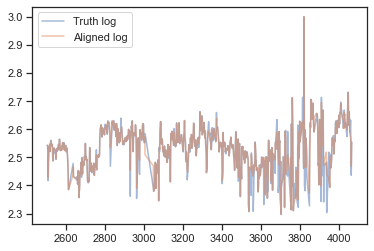

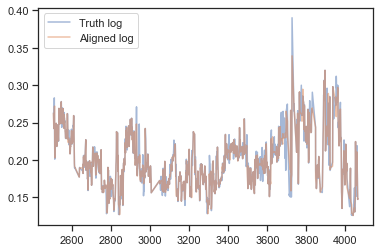

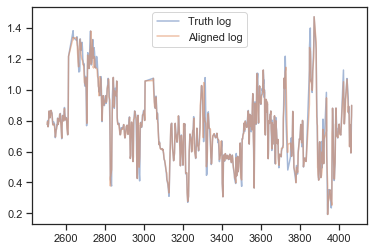

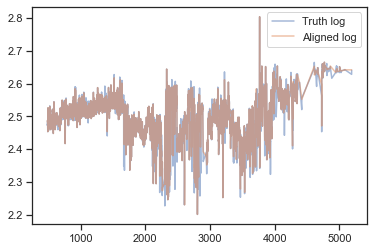

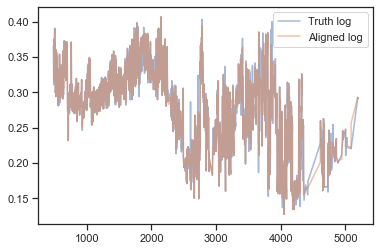

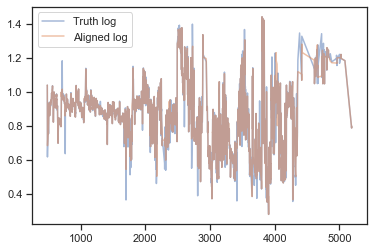

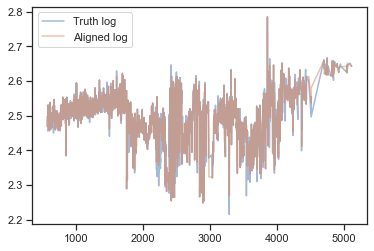

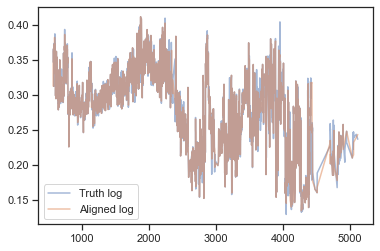

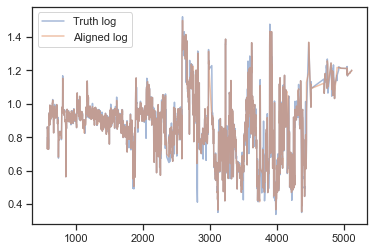

In [20]:
dfs_val = dict(tuple(val_well.groupby('well')))

N=101
for well in list(dfs_val.keys()):
    for mykey in Y_feat:
        ref=dfs_val[well][f'{mykey}'].values
        query=dfs_val[well][f'{mykey}_raw'].values

        ref_mean=np.convolve(ref, np.ones(N)/N, mode='same')
        query_mean=np.convolve(query, np.ones(N)/N, mode='same')

        ref2_mean=np.convolve((ref-ref_mean)**2, np.ones(N)/N, mode='same')
        query2_mean=np.convolve((query-query_mean)**2, np.ones(N)/N, mode='same')    

        ref_norm=(ref-ref_mean)/ref2_mean
        query_norm=(query-query_mean)/query2_mean


        query=(query-query.mean())/query.std()*ref.std()+ref.mean()
    #     loss_matrix=(query.reshape(1,-1)-ref.reshape(-1,1))**2
        alignmentOBE = dtw(query,ref,
                             step_pattern="asymmetric",# dist=lambda x, y: 10000000-x*y,
                             window_type="sakoechiba", window_size=201)
        mypath=alignmentOBE.get_warping_path(target="reference")
        dfs_val[well][f'{mykey}_dept_pred']=dfs_val[well]['DEPT'].values[mypath]
        
        f=interpolate.interp1d(dfs_val[well]['DEPT'].values[mypath]+0.0000001*np.arange(dfs_val[well]['DEPT'].values.size),dfs_val[well][f'{mykey}_raw'].values,
                               fill_value=(dfs_val[well][f'{mykey}_raw'].values[0], dfs_val[well][f'{mykey}_raw'].values[-1]), 
                               bounds_error=False,kind=1)
        dfs_val[well][f'{mykey}_val_pred']=f(dfs_val[well]['DEPT'].values)

        
        
        plt.figure()
        plt.plot(dfs_val[well]['DEPT'].values,dfs_val[well][f'{mykey}'].values,alpha=0.5,label='Truth log')
#         plt.plot(dfs_val[well]['DEPT'].values,dfs_val[well][f'{mykey}_pred'].values,alpha=0.5,label='Predict log')
        plt.plot(dfs_val[well][f'{mykey}_dept_pred'].values,dfs_val[well][f'{mykey}_raw'].values,alpha=0.5,label='Aligned log')
#         plt.plot(dfs_val[well]['DEPT'].values,dfs_val[well][f'{mykey}_val_pred'],alpha=0.5,label='Aligned log')
#         plt.plot(dfs_val[well]['DEPT'].values,dfs_val[well][f'{mykey}_val_pred'],alpha=0.5,label='Aligned log')
        plt.legend()
        plt.show()

# Evaluate the performance of this alignment algorithm

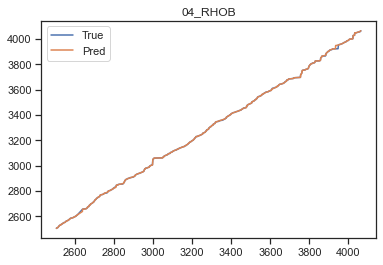

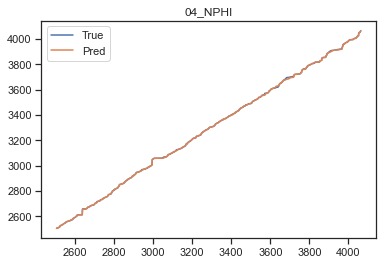

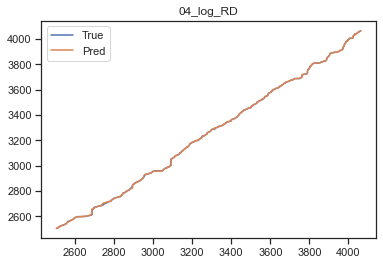

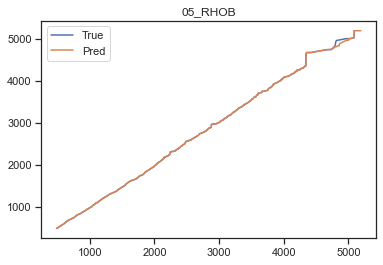

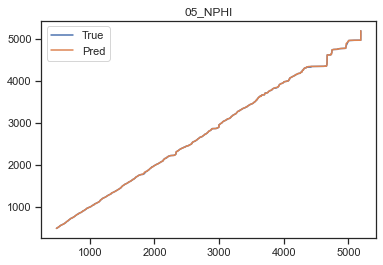

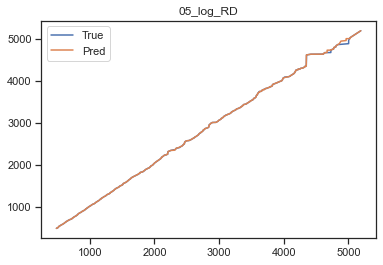

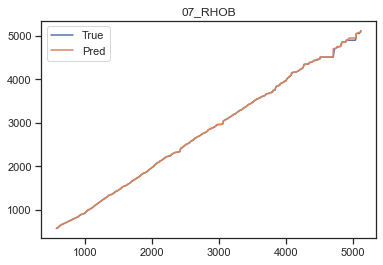

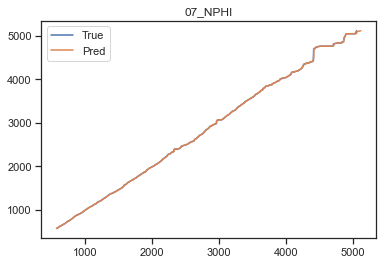

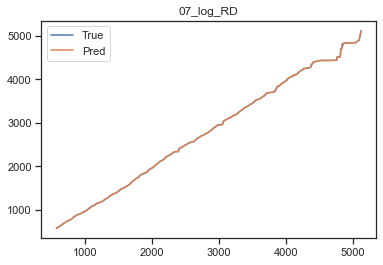

In [21]:
for well in list(dfs_val.keys()):
    for mykey in Y_feat:
        plt.figure()
        plt.plot(dfs_val[well][f'{mykey}_dept'].values,dfs_val[well]['DEPT'].values,label='True')
        plt.plot(dfs_val[well][f'{mykey}_dept_pred'],dfs_val[well]['DEPT'].values,label='Pred')
        plt.title(f'{well}_{mykey}')
        plt.legend()
        plt.show()

# Perform alignment for each well assuming we don't know the truth logs

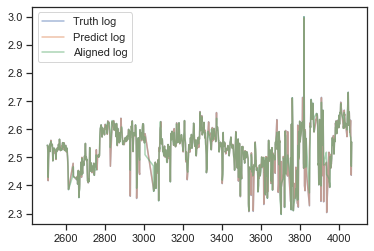

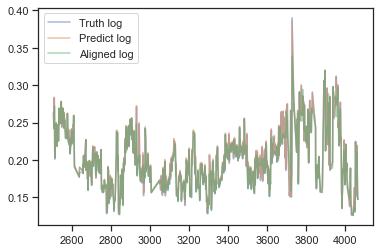

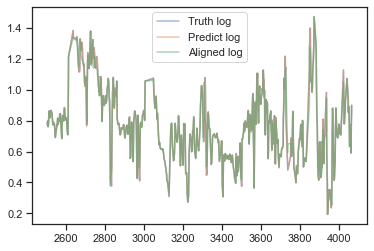

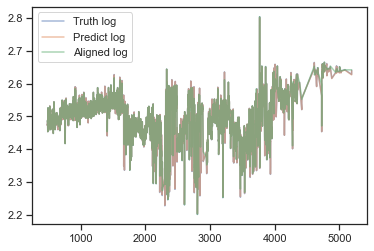

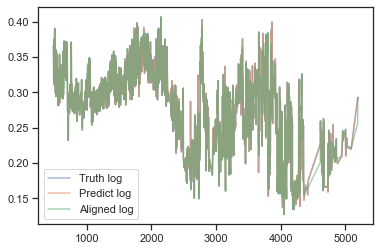

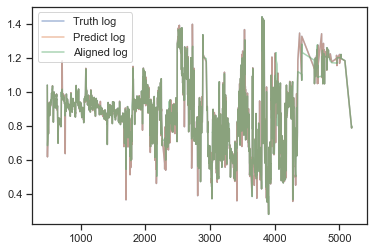

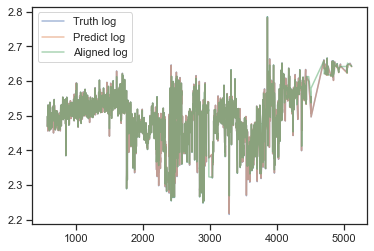

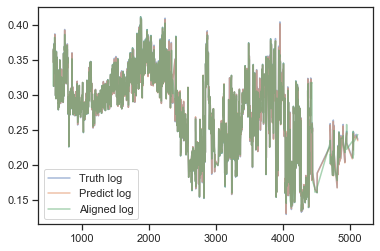

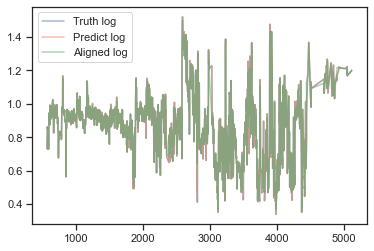

In [22]:
N=101
for well in list(dfs_val.keys()):
    for mykey in Y_feat:
        ref=dfs_val[well][f'{mykey}_pred'].values
        query=dfs_val[well][f'{mykey}_raw'].values

        ref_mean=np.convolve(ref, np.ones(N)/N, mode='same')
        query_mean=np.convolve(query, np.ones(N)/N, mode='same')

        ref2_mean=np.convolve((ref-ref_mean)**2, np.ones(N)/N, mode='same')
        query2_mean=np.convolve((query-query_mean)**2, np.ones(N)/N, mode='same')    

        ref_norm=(ref-ref_mean)/ref2_mean
        query_norm=(query-query_mean)/query2_mean


        query=(query-query.mean())/query.std()*ref.std()+ref.mean()
    #     loss_matrix=(query.reshape(1,-1)-ref.reshape(-1,1))**2
        alignmentOBE = dtw(query,ref,
                             step_pattern="asymmetric",# dist=lambda x, y: 10000000-x*y,
                             window_type="sakoechiba", window_size=201)
        mypath=alignmentOBE.get_warping_path(target="reference")
        dfs_val[well][f'{mykey}_dept_pred']=dfs_val[well]['DEPT'].values[mypath]
        
        f=interpolate.interp1d(dfs_val[well]['DEPT'].values[mypath]+0.0000001*np.arange(dfs_val[well]['DEPT'].values.size),dfs_val[well][f'{mykey}_raw'].values,
                               fill_value=(dfs_val[well][f'{mykey}_raw'].values[0], dfs_val[well][f'{mykey}_raw'].values[-1]), 
                               bounds_error=False,kind=1)
        dfs_val[well][f'{mykey}_val_pred']=f(dfs_val[well]['DEPT'].values)

        
        
        plt.figure()
        plt.plot(dfs_val[well]['DEPT'].values,dfs_val[well][f'{mykey}'].values,alpha=0.5,label='Truth log')
        plt.plot(dfs_val[well]['DEPT'].values,dfs_val[well][f'{mykey}_pred'].values,alpha=0.5,label='Predict log')
        plt.plot(dfs_val[well][f'{mykey}_dept_pred'].values,dfs_val[well][f'{mykey}_raw'].values,alpha=0.5,label='Aligned log')
#         plt.plot(dfs_val[well]['DEPT'].values,dfs_val[well][f'{mykey}_val_pred'],alpha=0.5,label='Aligned log')
#         plt.plot(dfs_val[well]['DEPT'].values,dfs_val[well][f'{mykey}_val_pred'],alpha=0.5,label='Aligned log')
        plt.legend()
        plt.show()

# Evaluate the performance of this alignment algorithm

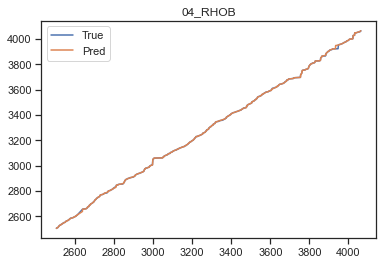

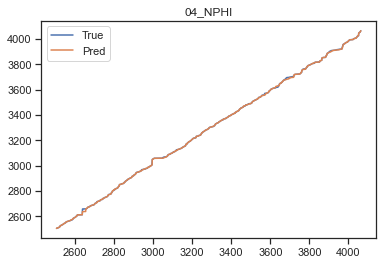

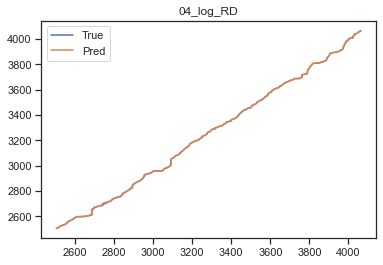

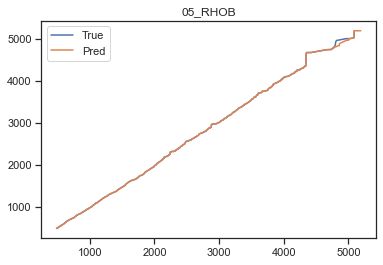

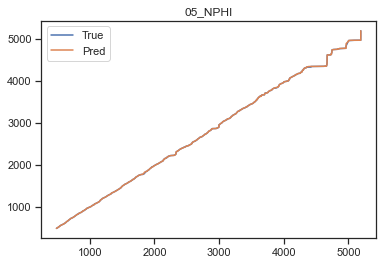

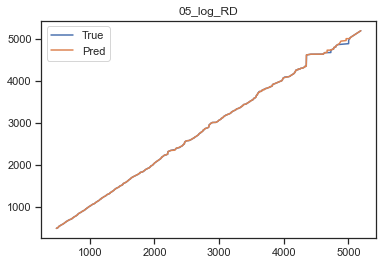

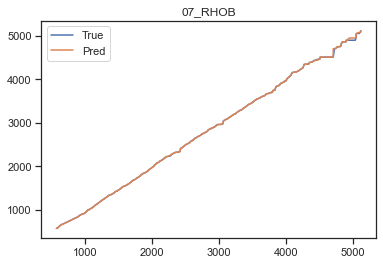

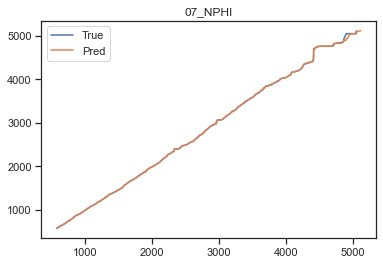

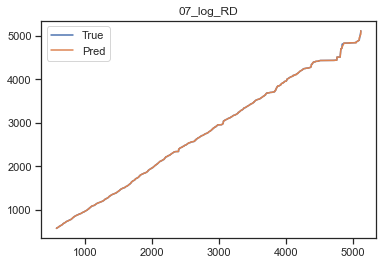

In [23]:
for well in list(dfs_val.keys()):
    for mykey in Y_feat:
        plt.figure()
        plt.plot(dfs_val[well][f'{mykey}_dept'].values,dfs_val[well]['DEPT'].values,label='True')
        plt.plot(dfs_val[well][f'{mykey}_dept_pred'],dfs_val[well]['DEPT'].values,label='Pred')
        plt.title(f'{well}_{mykey}')
        plt.legend()
        plt.show()

# Calculate NMSE and MAD

In [24]:
score={}
score['nmse']={}
score['mad']={}
dfs_val_all=pd.concat([dfs_val[mykey] for mykey in dfs_val.keys()])

In [25]:
for mykey in Y_feat:
    score['nmse'][mykey]=(((dfs_val_all[f'{mykey}_val_pred'].values-dfs_val_all[f'{mykey}'].values)**2).mean())/(np.mean((dfs_val_all[f'{mykey}'].values)**2))
    score['mad'][mykey]=np.abs(dfs_val[well][f'{mykey}_dept'].values-dfs_val[well][f'{mykey}_dept_pred'].values).mean()
print(score)

{'nmse': {'RHOB': 5.294423763149114e-05, 'NPHI': 0.0012476297922031456, 'log_RD': 0.0018731481652662725}, 'mad': {'RHOB': 0.9436123420303446, 'NPHI': 0.7792515694116436, 'log_RD': 0.8013808651396908}}


# Prediction

In [26]:
def shift_log(dfs_val,log,N=1001):
    for well in range(len(dfs_val)):
        mykey=log
        ref=dfs_val[well][f'{mykey}_sft'].values
        query=dfs_val[well][f'{mykey}'].values

        ref_mean=np.convolve(ref, np.ones(N)/N, mode='same')
        query_mean=np.convolve(query, np.ones(N)/N, mode='same')

        ref2_mean=np.convolve((ref-ref_mean)**2, np.ones(N)/N, mode='same')
        query2_mean=np.convolve((query-query_mean)**2, np.ones(N)/N, mode='same')    

        ref_norm=(ref-ref_mean)/ref2_mean
        query_norm=(query-query_mean)/query2_mean


        query=(query-query.mean())/query.std()*ref.std()+ref.mean()
    #     loss_matrix=(query.reshape(1,-1)-ref.reshape(-1,1))**2
        alignmentOBE = dtw(query,ref,
                             step_pattern="asymmetric",# dist=lambda x, y: 10000000-x*y,
                             window_type="sakoechiba", window_size=301)
        mypath=alignmentOBE.get_warping_path(target="reference")
        dfs_val[well][f'{mykey}_dept_pred']=dfs_val[well]['DEPT'].values[mypath]

        f=interpolate.interp1d(dfs_val[well]['DEPT'].values[mypath]+0.0000001*np.arange(dfs_val[well]['DEPT'].values.size),dfs_val[well][f'{mykey}'].values,
                               fill_value=(dfs_val[well][f'{mykey}'].values[0], dfs_val[well][f'{mykey}'].values[-1]), 
                               bounds_error=False,kind=1)
        dfs_val[well][f'{mykey}_pred']=f(dfs_val[well]['DEPT'].values)
    return dfs_val

In [27]:
files=glob.glob('test/*.csv')
df_test = []
for i in files:
    df0=pd.read_csv(i)
    df0['well']=i.split('align')[-1]
    df0['well']='align'+df0['well']
    df0['log_RD']=np.log10(df0['RD'])
    df_test.append(df0.copy())

In [33]:
for i in range(len(df_test)):
    df_test[i][f'{y_feat1[0]}_sft']=model_best_1.predict(df_test[i][x_feat1].values)
df_test=shift_log(df_test,y_feat1[0])  

for i in range(len(df_test)):
    df_test[i][f'{y_feat2[0]}_sft']=model_best_2.predict(df_test[i][x_feat2].values)
df_test=shift_log(df_test,y_feat2[0])   

for i in range(len(df_test)):
    df_test[i][f'{y_feat3[0]}_sft']=model_best_3.predict(df_test[i][x_feat3].values)
df_test=shift_log(df_test,y_feat3[0])

In [34]:
sub_path = 'submission'
ref_features=['DEPT','GR']
pred_features=['NPHI','RHOB','RD']
val_pred=[i+'_pred' for i in pred_features]
dep_sft_pred=[i+'_dept_pred' for i in pred_features]
output_feat=ref_features+pred_features+val_pred+dep_sft_pred
if not os.path.isdir(sub_path):
    os.makedirs(sub_path)
for df in df_test:
    wellname=df.loc[0,'well']
    df['RD_pred']=10**df['log_RD_pred'].copy()
    df['RD_dept_pred']=df['log_RD_dept_pred'].copy()
    df[output_feat].to_csv(os.path.join(sub_path,wellname), index=False)

shutil.make_archive('All_For_A_Dream_submission_20', 'zip', sub_path)

'F:\\PyCharm\\Machine-Learning-Competition-2023-main\\data\\All_For_A_Dream_submission_20.zip'